<a href="https://colab.research.google.com/github/milicak/Data_Analysis_Course/blob/main/Compute_EOF_ElNino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!pip install eofs
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 879.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 942.4/942.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 34.2 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.1
    Uninstalling pyproj-3.7.1:
      Successfully uninstalled pyproj-3.7.1
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 75.4 MB/s eta 0:00:00


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Corrected URL pointing to the actual NetCDF file
# url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.oisst.mon.mean.1982.nc'
url = 'https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.mnmean.nc'
!wget $url


--2025-05-07 18:56:36--  https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.oisst.v2/sst.mnmean.nc
Resolving psl.noaa.gov (psl.noaa.gov)... 140.172.38.12
Connecting to psl.noaa.gov (psl.noaa.gov)|140.172.38.12|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 64038940 (61M) [application/x-netcdf]
Saving to: ‘sst.mnmean.nc’

sst.mnmean.nc       100%[===================>]  61.07M  2.58MB/s    in 22s     

2025-05-07 18:56:58 (2.73 MB/s) - ‘sst.mnmean.nc’ saved [64038940/64038940]



In [3]:
df = xr.open_dataset('sst.mnmean.nc')
df

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 494, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2023-01-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 128MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

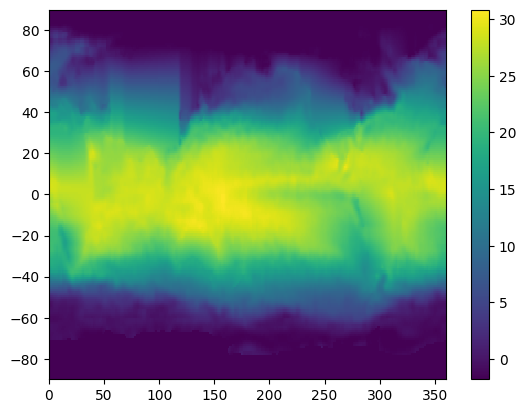

In [4]:
plt.pcolormesh(df.lon,df.lat,df.sst[0,:,:])
plt.colorbar()
plt.show()

In [ ]:
df = df.sel(time=slice('1982-01-01','2022-12-31'))
df

<xarray.Dataset> Size: 128MB
Dimensions:    (lat: 180, lon: 360, time: 492, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2022-12-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 128MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

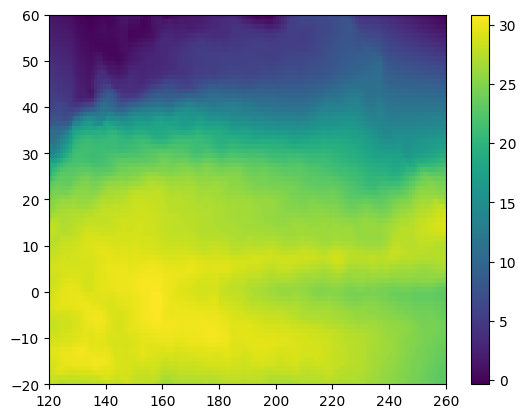

In [5]:
df2 = df.sel(lon=slice(120,260),lat=slice(60,-20))
plt.pcolormesh(df2.lon,df2.lat,df2.sst[0,:,:])
plt.colorbar()
plt.show()

In [6]:
ds_season = df2.where(df2['time.season'] == 'DJF').groupby('time.year').mean('time')
ds_season
sst = ds_season - ds_season.sst.mean('year')
sst

<xarray.Dataset> Size: 2MB
Dimensions:  (lat: 80, lon: 140, year: 43)
Coordinates:
  * lat      (lat) float32 320B 59.5 58.5 57.5 56.5 ... -16.5 -17.5 -18.5 -19.5
  * lon      (lon) float32 560B 120.5 121.5 122.5 123.5 ... 257.5 258.5 259.5
  * year     (year) int64 344B 1981 1982 1983 1984 1985 ... 2020 2021 2022 2023
Data variables:
    sst      (year, lat, lon) float32 2MB 1.074 1.077 0.9008 ... 0.1116 0.09054

In [7]:
sst = sst.sst
sst

<xarray.DataArray 'sst' (year: 43, lat: 80, lon: 140)> Size: 2MB
array([[[ 1.073876  ,  1.0772867 ,  0.9007752 , ...,  0.52930236,
          0.51480615,  0.4920929 ],
        [ 1.1551163 ,  1.1616279 ,  0.9670542 , ...,  0.6439535 ,
          0.6185271 ,  0.60186046],
        [ 1.2354264 ,  1.2366666 ,  1.0327132 , ...,  0.69860464,
          0.684186  ,  0.6687597 ],
        ...,
        [-1.0182152 , -0.9865837 , -0.75868034, ..., -0.4586048 ,
         -0.4468174 , -0.42860222],
        [-1.394186  , -1.3824806 , -1.264967  , ..., -0.56256104,
         -0.5699997 , -0.56147003],
        [-1.6759663 , -1.6886806 , -1.5081444 , ..., -0.69000053,
         -0.71837044, -0.73946   ]],

       [[ 0.1572093 ,  0.1506201 ,  0.05410856, ..., -0.1573643 ,
         -0.1651938 , -0.17124039],
        [ 0.16844964,  0.16496125,  0.05705422, ..., -0.15604651,
         -0.16480619, -0.17480616],
        [ 0.18209302,  0.17999995,  0.06604642, ..., -0.14472869,
         -0.15248062, -0.16124031],
...
        [ 0.34511757,  0.3967495 ,  0.43465424, ..., -0.7786064 ,
         -0.76348305, -0.74526787],
        [ 0.42914772,  0.48085403,  0.4583683 , ..., -0.7458935 ,
         -0.7133312 , -0.6914711 ],
        [ 0.48070145,  0.5346508 ,  0.47185516, ..., -0.7199993 ,
         -0.6783695 , -0.649456  ]],

       [[-0.696124  , -0.72271323, -0.64922476, ...,  0.20930237,
          0.19480619,  0.17209291],
        [-0.74488366, -0.76837206, -0.6829458 , ...,  0.21395347,
          0.19852713,  0.19186048],
        [-0.79457355, -0.8133334 , -0.7372869 , ...,  0.21860462,
          0.20418605,  0.18875968],
        ...,
        [-0.3082142 , -0.28658485, -0.3186798 , ..., -0.11860466,
         -0.13681602, -0.1386013 ],
        [-0.07418633, -0.04248047, -0.09496689, ..., -0.0125618 ,
         -0.03000069, -0.04147148],
        [ 0.12403297,  0.17131996,  0.04185486, ...,  0.12999916,
          0.11162949,  0.09053993]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 320B 59.5 58.5 57.5 56.5 ... -16.5 -17.5 -18.5 -19.5
  * lon      (lon) float32 560B 120.5 121.5 122.5 123.5 ... 257.5 258.5 259.5
  * year     (year) int64 344B 1981 1982 1983 1984 1985 ... 2020 2021 2022 2023

In [8]:
sst = sst.rename({'year':'time'})

In [9]:
from eofs.xarray import Eof

In [10]:
coslat = np.cos(np.deg2rad(sst.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


In [18]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=1)
pc1 = solver.pcs(npcs=1, pcscaling=1)


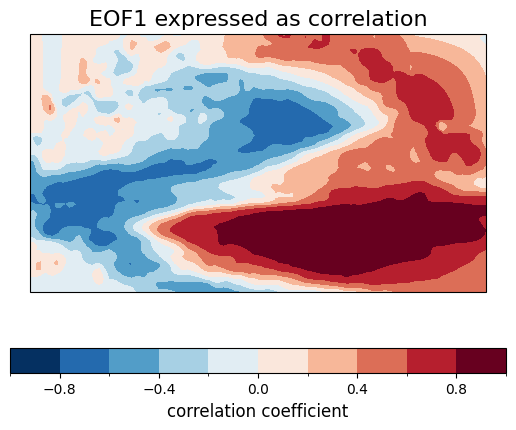

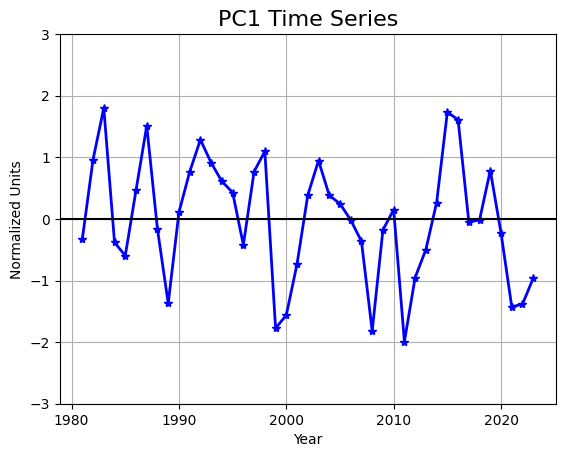

In [27]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b',marker='*', linewidth=2)
plt.grid()
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

In [26]:
solver.varianceFraction()

<xarray.DataArray 'variance_fractions' (mode: 43)> Size: 172B
array([3.69753689e-01, 1.42248616e-01, 1.01251334e-01, 5.94459996e-02,
       4.27581221e-02, 3.98211293e-02, 2.92398445e-02, 2.37387139e-02,
       1.88811775e-02, 1.63221173e-02, 1.56799555e-02, 1.31915901e-02,
       1.15405815e-02, 1.09957019e-02, 9.24779475e-03, 8.47066473e-03,
       8.10499489e-03, 6.24839403e-03, 5.99246519e-03, 5.48310578e-03,
       5.18045109e-03, 5.14542731e-03, 4.76201717e-03, 4.25675977e-03,
       4.02720831e-03, 3.92482616e-03, 3.52948951e-03, 3.16864275e-03,
       2.96080392e-03, 2.93022254e-03, 2.67002010e-03, 2.41218903e-03,
       2.22792849e-03, 2.08220654e-03, 1.91536080e-03, 1.80216576e-03,
       1.66556577e-03, 1.62143353e-03, 1.45841716e-03, 1.43998745e-03,
       1.23307155e-03, 1.16977526e-03, 4.40580296e-16], dtype=float32)
Coordinates:
  * mode     (mode) int64 344B 0 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40 41 42
Attributes:
    long_name:  variance_fractions

In [20]:
eof1

<xarray.DataArray 'eofs' (mode: 2, lat: 80, lon: 140)> Size: 90kB
array([[[ 0.09059902,  0.09301541,  0.072253  , ...,  0.02614097,
          0.01086463, -0.0088851 ],
        [ 0.09017628,  0.09127646,  0.07174844, ...,  0.00167973,
         -0.01443538, -0.03925053],
        [ 0.09362878,  0.0940675 ,  0.07260419, ...,  0.0099399 ,
         -0.01444535, -0.03370605],
        ...,
        [-0.16840737, -0.14340962, -0.1476917 , ...,  0.4858965 ,
          0.4753667 ,  0.46476457],
        [-0.19336402, -0.16060479, -0.16083108, ...,  0.4614508 ,
          0.45388493,  0.4485474 ],
        [-0.2025963 , -0.16980705, -0.1696016 , ...,  0.42055807,
          0.41674823,  0.41632307]],

       [[-0.24734466, -0.26022926, -0.32711565, ..., -0.7958229 ,
         -0.795335  , -0.7863655 ],
        [-0.24675351, -0.26189244, -0.32787126, ..., -0.8017517 ,
         -0.797367  , -0.79256976],
        [-0.24876776, -0.26245376, -0.32510877, ..., -0.8018012 ,
         -0.8019373 , -0.7970544 ],
        ...,
        [-0.279325  , -0.32667804, -0.34111845, ...,  0.47428656,
          0.4856447 ,  0.49100816],
        [-0.31958985, -0.36378837, -0.35728493, ...,  0.4492063 ,
          0.4629251 ,  0.4712443 ],
        [-0.33644336, -0.37461242, -0.3582348 , ...,  0.4267834 ,
          0.44296062,  0.45436522]]], dtype=float32)
Coordinates:
  * mode     (mode) int64 16B 0 1
  * lat      (lat) float32 320B 59.5 58.5 57.5 56.5 ... -16.5 -17.5 -18.5 -19.5
  * lon      (lon) float32 560B 120.5 121.5 122.5 123.5 ... 257.5 258.5 259.5
Attributes:
    long_name:  correlation_between_pcs_and_sst